<a href="https://colab.research.google.com/github/PRANAV7389/Web_scrap/blob/main/List_of_largest_companies_by_revenue_scrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [8]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue"
r = requests.get(url)
print(r)
soup = BeautifulSoup(r.text,"html")

<Response [200]>


In [ ]:
print(soup.prettify())

In [ ]:
soup.find("table")

In [ ]:
soup.find_all("table")[0]

In [19]:
table = soup.find('table',class_="wikitable sortable")

In [28]:
titles= table.find_all("th")

In [29]:
table_titles = [title.text.strip() for title in titles]

In [30]:
print(table_titles)

['Rank', 'Name', 'Industry', 'Revenue', 'Profit', 'Employees', 'Headquarters[note 1]', 'State-owned', 'Ref.', '', 'USD millions', 'Revenue per worker', 'Revenue per worker', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']


In [37]:
table_titles[6]='Headquarters'

In [39]:
final_title = table_titles[0:7]

In [60]:
df = pd.DataFrame(columns = final_title)
df= df.drop("Rank",axis=1)
df

,Name,Industry,Revenue,Profit,Employees,Headquarters


In [42]:
column_data = table.find_all('tr')

In [62]:
for row in column_data[2:]:
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data][0:6]

  length = len(df)
  df.loc[length] =  individual_row_data

In [63]:
df

,Name,Industry,Revenue,Profit,Employees,Headquarters
0,Walmart,Retail,"$611,289","$11,680","2,100,000",United States
1,Saudi Aramco,Oil and gas,"$603,651","$159,069","70,496",Saudi Arabia
2,State Grid Corporation of China,Electricity,"$530,009","$8,192","870,287",China
3,Amazon,Retail,"$513,983","−$2,722","1,541,000",United States
4,Vitol,Commodities,"$505,000","$15,000","1,560",Switzerland
...,...,...,...,...,...,...
95,Baowu,Steel,"$161,698","$2,493","245,675",China
96,Schwarz Gruppe,Retail,"$159,800",...,"575,000",Germany
97,Mitsubishi Group,Conglomerate,"$159,371","$8,723","79,706",Japan
98,Ford Motor Company,Automotive,"$158,057","−$1,981","173,000",United States


No charts were generated by quickchart


In [65]:
df.describe()

,Name,Industry,Revenue,Profit,Employees,Headquarters
count,100,100,100,100,100,100
unique,50,13,50,48,50,13
top,Walmart,Oil and gas,"$611,289",...,"2,100,000",United States
freq,2,26,2,4,2,40


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          100 non-null    object
 1   Industry      100 non-null    object
 2   Revenue       100 non-null    object
 3   Profit        100 non-null    object
 4   Employees     100 non-null    object
 5   Headquarters  100 non-null    object
dtypes: object(6)
memory usage: 5.5+ KB


In [81]:
df["Profit"]= df["Profit"].str.replace("$","")

<ipython-input-81-ad013fa7dfbe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Profit"]= df["Profit"].str.replace("$","")


In [82]:
df["Revenue"]= df["Revenue"].str.replace("$","")

<ipython-input-82-d992b0cfc64f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Revenue"]= df["Revenue"].str.replace("$","")


In [91]:
df["Profit"]= df["Profit"].str.replace(",","")
df["Revenue"]=df["Revenue"].str.replace(",","")

In [99]:
df

,Name,Industry,Revenue,Profit,Employees,Headquarters
0,Walmart,Retail,611289,11680,"2,100,000",United States
1,Saudi Aramco,Oil and gas,603651,159069,"70,496",Saudi Arabia
2,State Grid Corporation of China,Electricity,530009,8192,"870,287",China
3,Amazon,Retail,513983,−2722,"1,541,000",United States
4,Vitol,Commodities,505000,15000,"1,560",Switzerland
...,...,...,...,...,...,...
95,Baowu,Steel,161698,2493,"245,675",China
96,Schwarz Gruppe,Retail,159800,...,"575,000",Germany
97,Mitsubishi Group,Conglomerate,159371,8723,"79,706",Japan
98,Ford Motor Company,Automotive,158057,−1981,"173,000",United States


No charts were generated by quickchart


In [105]:
import numpy as np

In [116]:
df["Revenue"]=df["Revenue"].astype(float)

In [118]:
df["Employees"]=df["Employees"].str.replace(",","").astype(float)

In [128]:
df['Profit']=pd.to_numeric(df['Profit'],errors='coerce')

In [131]:
df.head()

,Name,Industry,Revenue,Profit,Employees,Headquarters
0,Walmart,Retail,611289.0,11680.0,2100000.0,United States
1,Saudi Aramco,Oil and gas,603651.0,159069.0,70496.0,Saudi Arabia
2,State Grid Corporation of China,Electricity,530009.0,8192.0,870287.0,China
3,Amazon,Retail,513983.0,NaN,1541000.0,United States
4,Vitol,Commodities,505000.0,15000.0,1560.0,Switzerland


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          100 non-null    object 
 1   Industry      100 non-null    object 
 2   Revenue       100 non-null    float64
 3   Profit        82 non-null     float64
 4   Employees     100 non-null    float64
 5   Headquarters  100 non-null    object 
dtypes: float64(3), object(3)
memory usage: 5.5+ KB


In [133]:
df.isna().sum()

Name             0
Industry         0
Revenue          0
Profit          18
Employees        0
Headquarters     0
dtype: int64

In [134]:
df.dropna(axis=0,inplace=True)

In [135]:
df.isna().sum()

Name            0
Industry        0
Revenue         0
Profit          0
Employees       0
Headquarters    0
dtype: int64

In [136]:
df.head()

,Name,Industry,Revenue,Profit,Employees,Headquarters
0,Walmart,Retail,611289.0,11680.0,2100000.0,United States
1,Saudi Aramco,Oil and gas,603651.0,159069.0,70496.0,Saudi Arabia
2,State Grid Corporation of China,Electricity,530009.0,8192.0,870287.0,China
4,Vitol,Commodities,505000.0,15000.0,1560.0,Switzerland
5,China National Petroleum Corporation,Oil and gas,483019.0,21080.0,1087049.0,China


In [137]:
df.describe()

,Revenue,Profit,Employees
count,82.000000,82.000000,8.200000e+01
mean,280763.170732,24695.195122,3.130627e+05
std,126359.474847,30264.534417,3.768288e+05
min,157403.000000,1699.000000,1.560000e+03
25%,180516.000000,6994.000000,7.049600e+04
50%,238587.000000,15233.000000,2.456750e+05
75%,322467.000000,21080.000000,3.824920e+05
max,611289.000000,159069.000000,2.100000e+06


In [138]:
import matplotlib.pyplot as plt


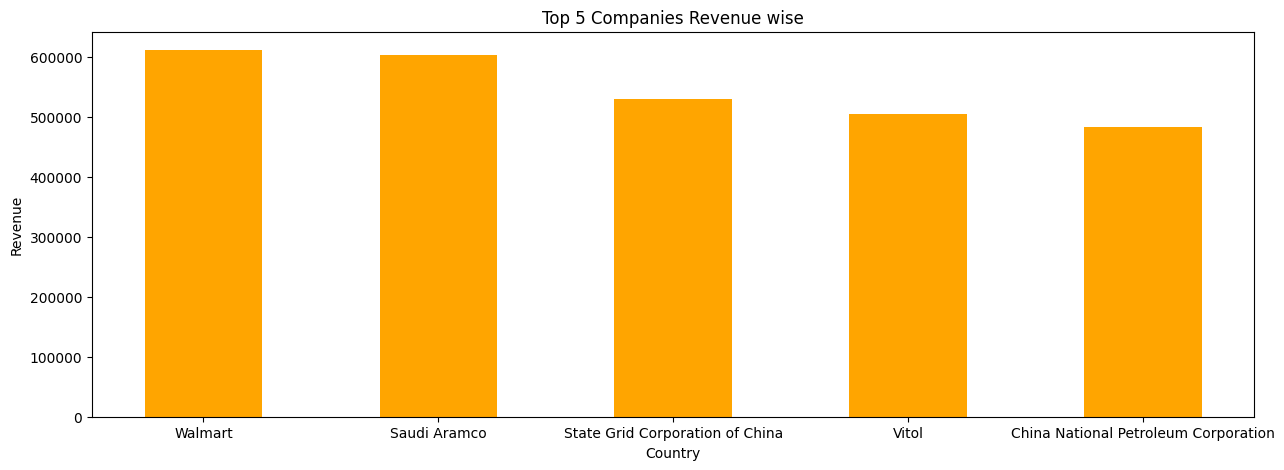

In [158]:
plt.figure(figsize=(15,5))
plt.bar(df["Name"][0:5],df["Revenue"][0:5],color="orange",width = 0.5)
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.title("Top 5 Companies Revenue wise")
plt.show()

In [159]:
import seaborn as sns

In [189]:
average_revenue_by_industry=df.groupby('Industry')['Revenue'].mean().sort_values(ascending=False)

In [190]:
x=average_revenue_by_industry.index
y=average_revenue_by_industry.values

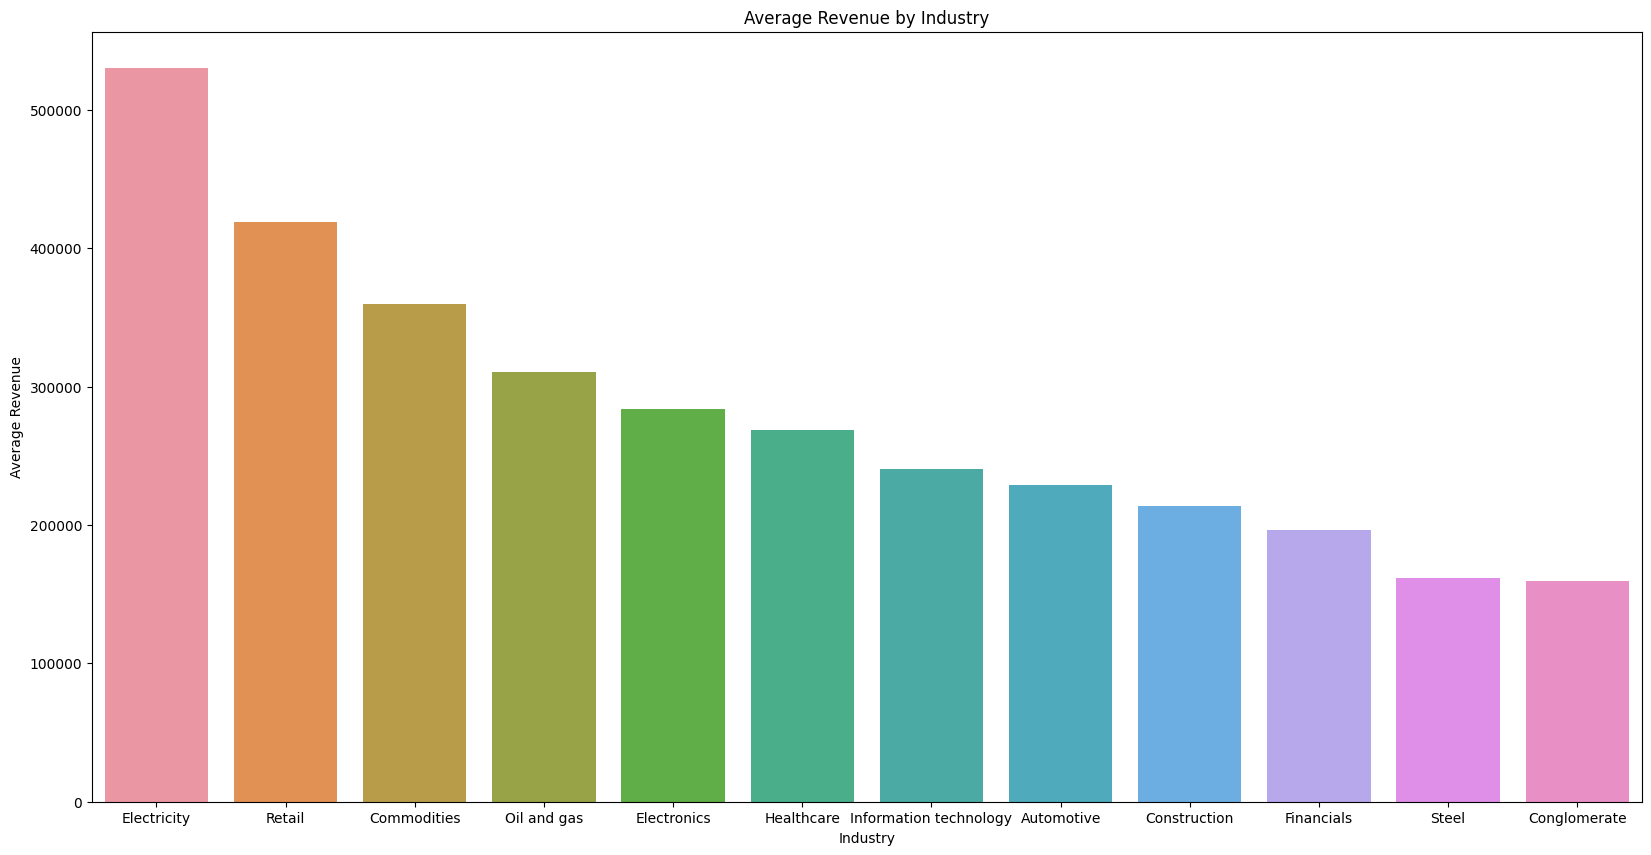

In [192]:
plt.figure(figsize=(20,10))
sns.barplot(x=x,y=y)
plt.xlabel('Industry')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Industry')
plt.show()

In [203]:
average_employee_by_industry=df.groupby('Industry')['Employees'].mean().sort_values(ascending=False)

In [204]:
X=average_employee_by_industry.index
Y=average_employee_by_industry.values

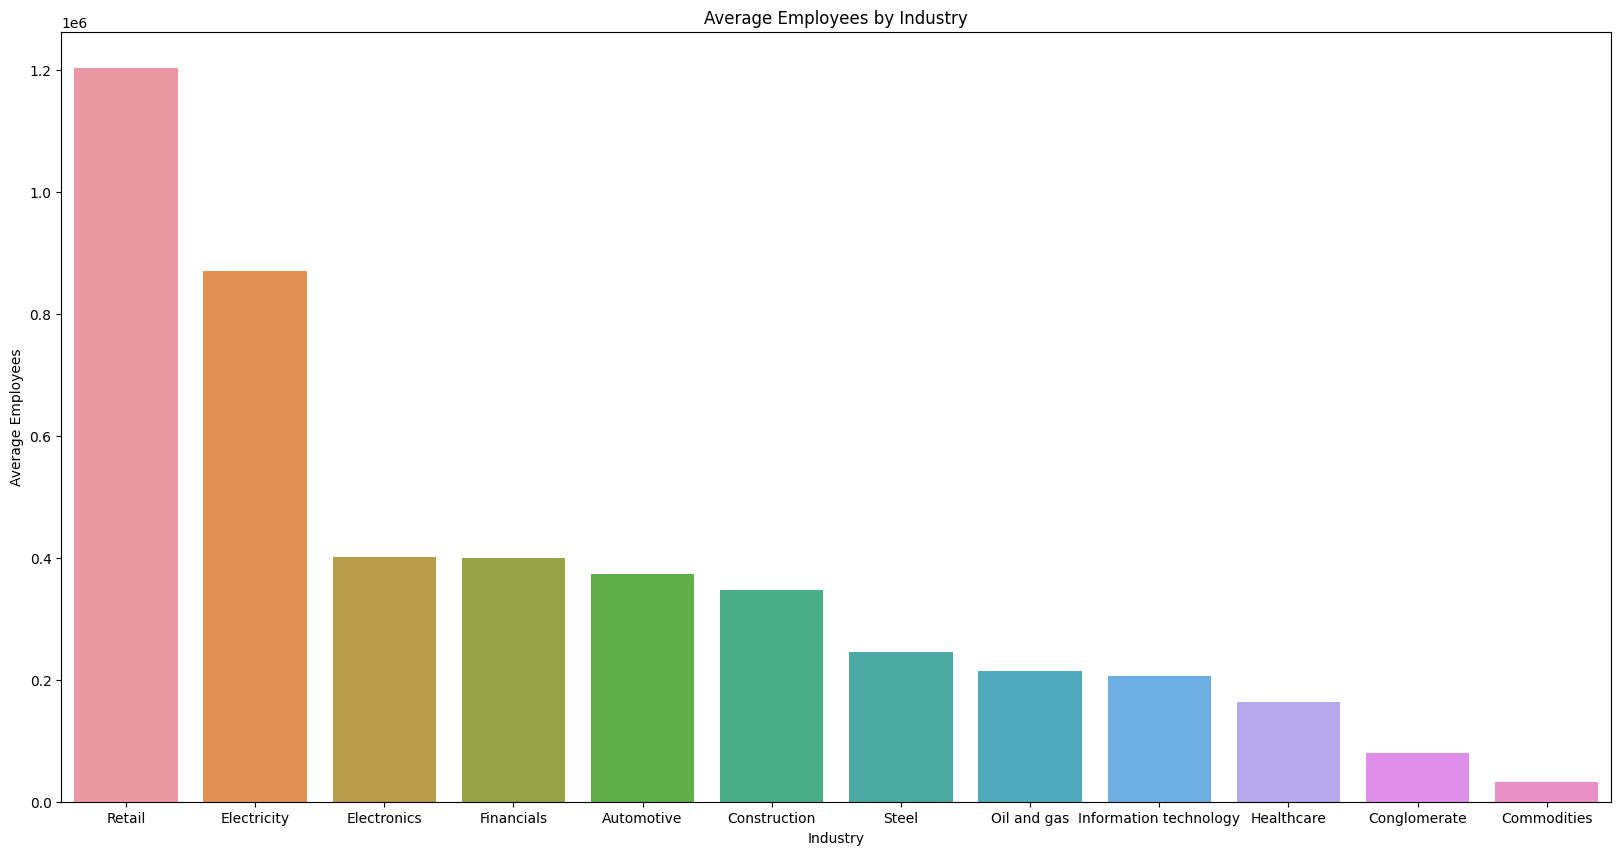

In [205]:
plt.figure(figsize=(20,10))
sns.barplot(x=X,y=Y)
plt.xlabel('Industry')
plt.ylabel('Average Employees')
plt.title('Average Employees by Industry')
plt.show()

In [ ]:
!pip install autoviz --upgrade

In [235]:
%matplotlib inline

In [239]:
df.to_csv("List_of_largest_companies.csv")

In [236]:
# import libraries
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
# create a class
AV = AutoViz_Class()

Shape of your Data Set loaded: (82, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables

################ Multi_Classification problem #####################


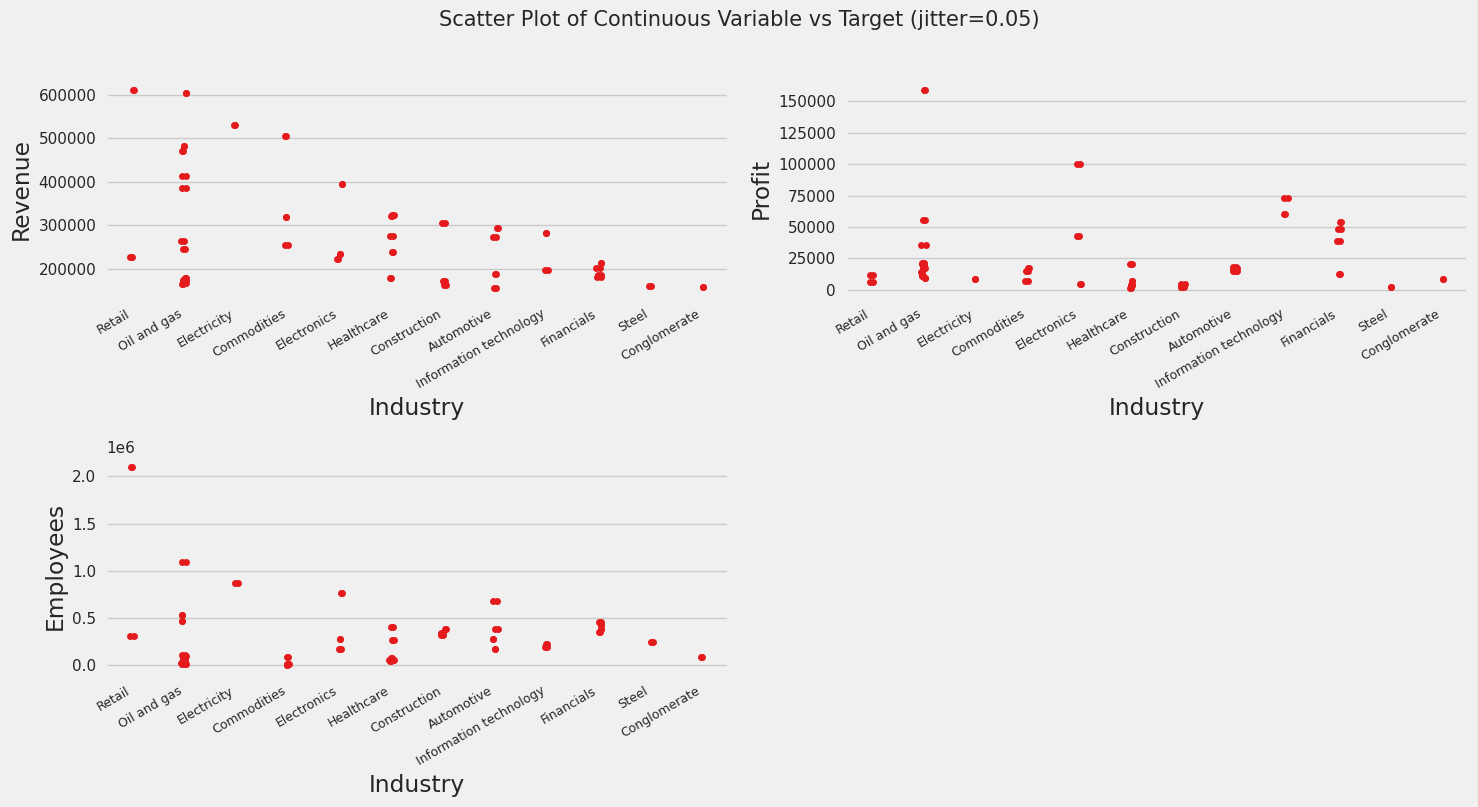

Total Number of Scatter Plots = 6


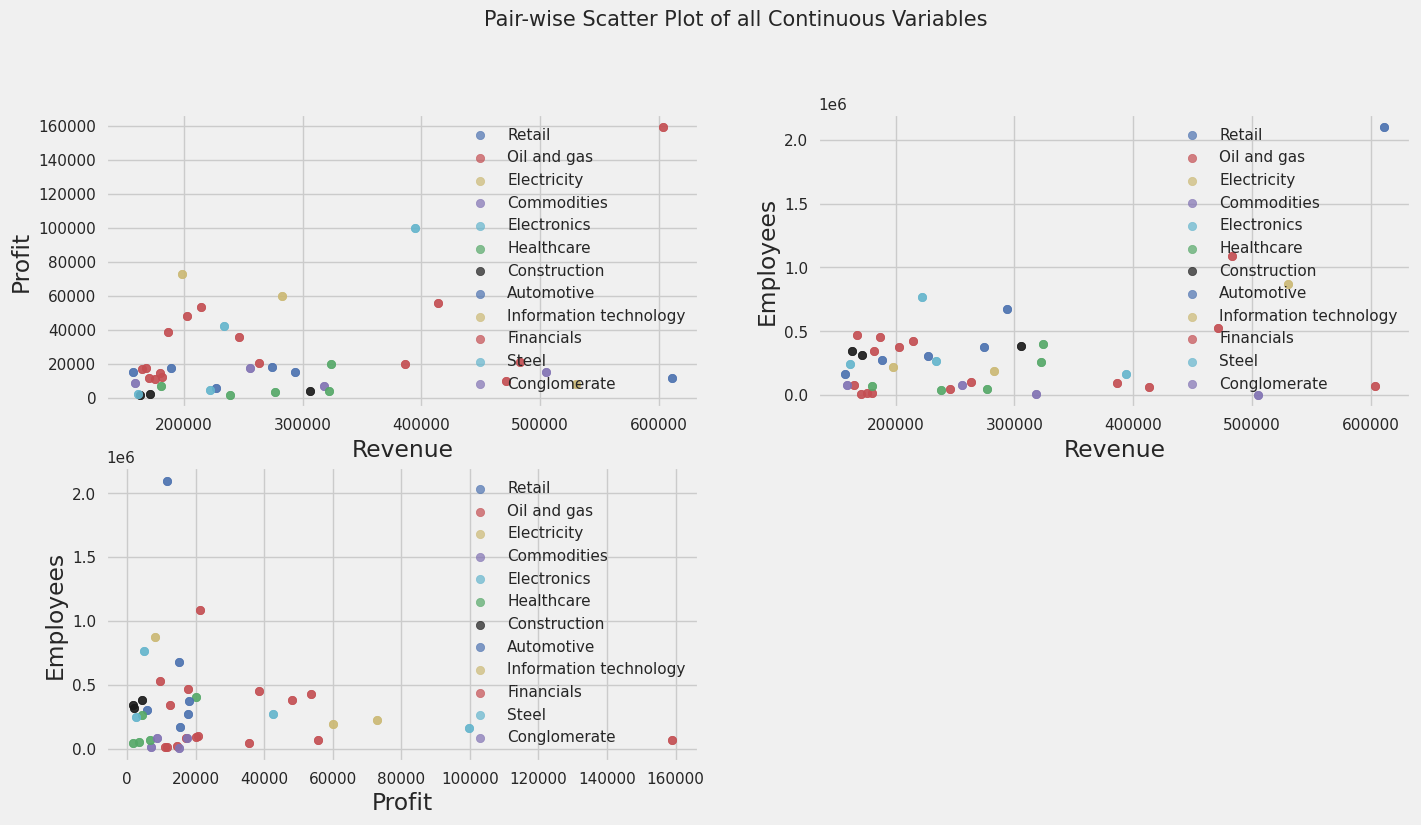

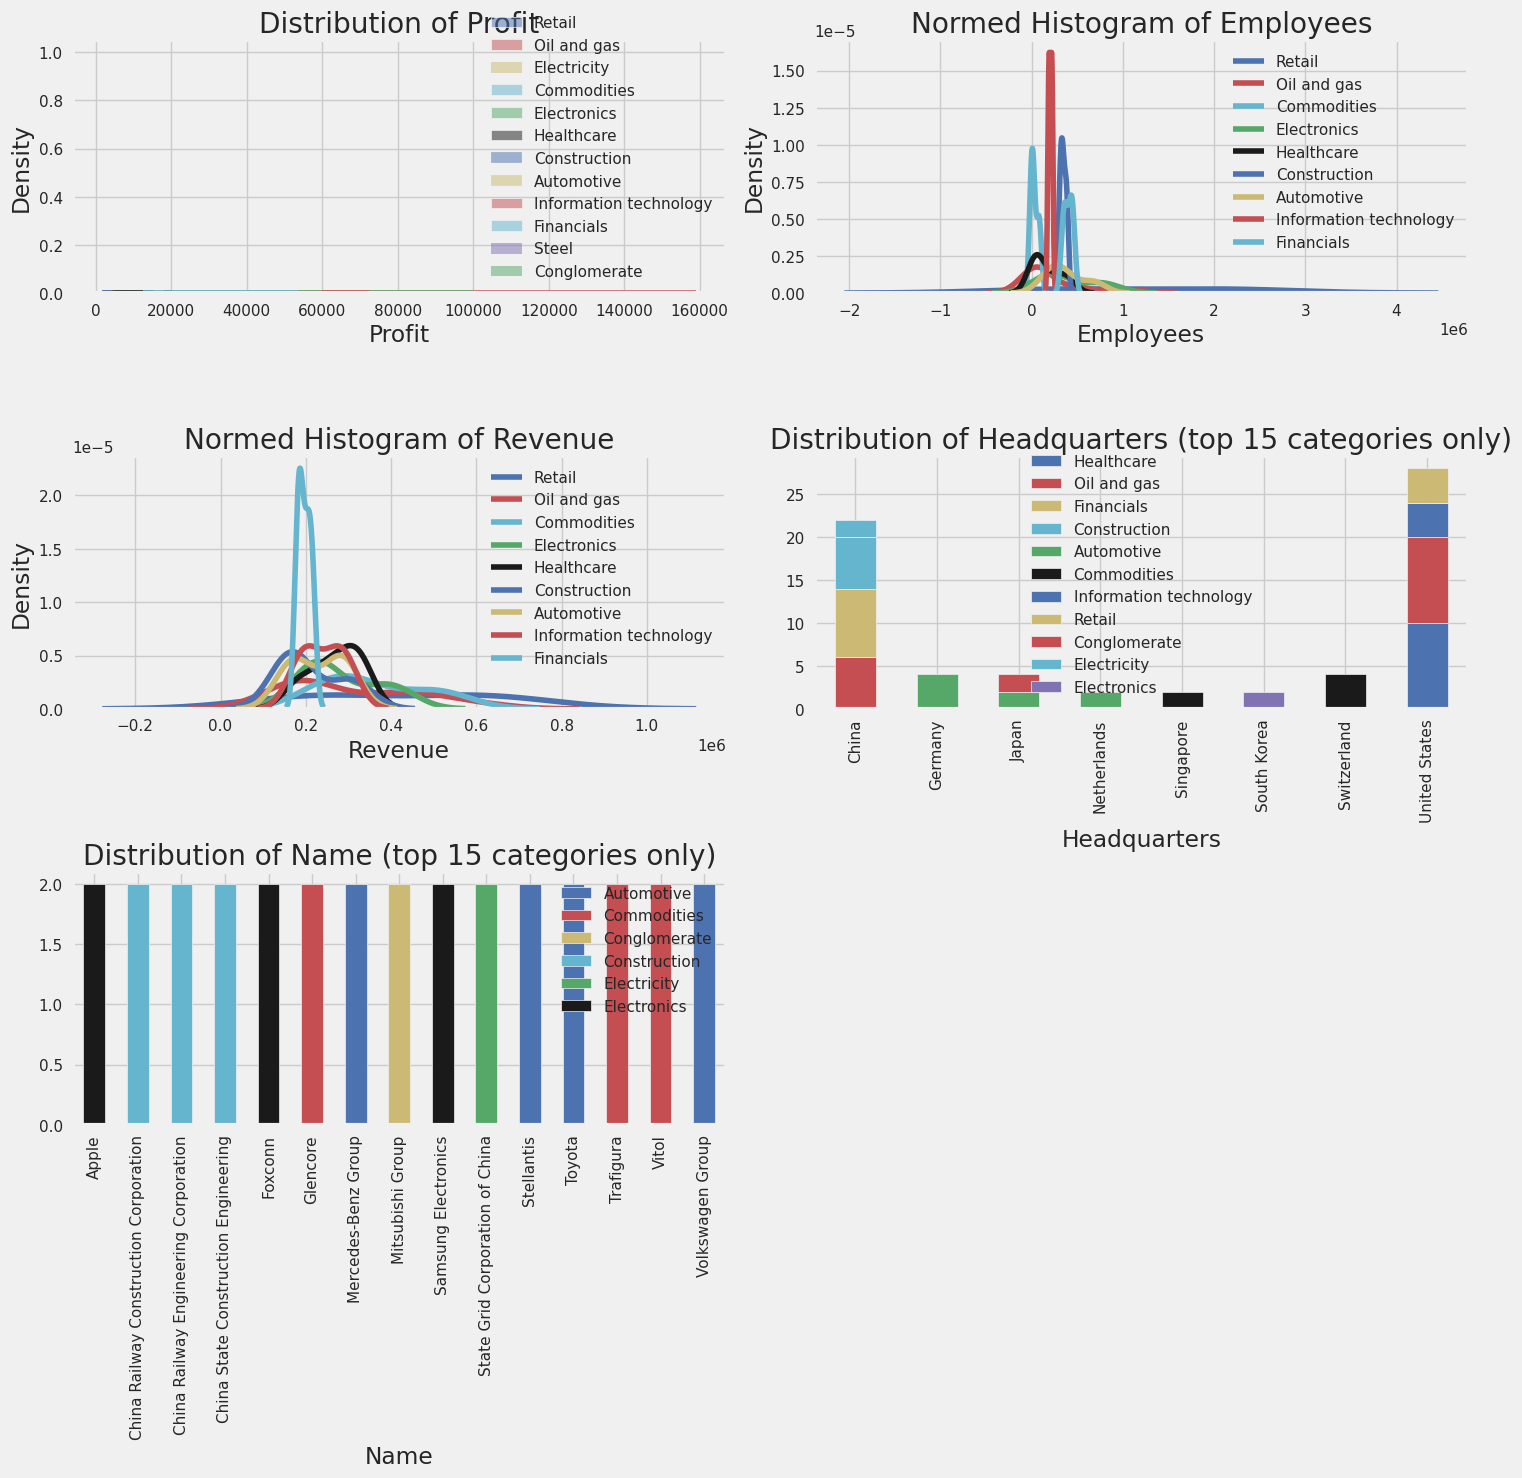

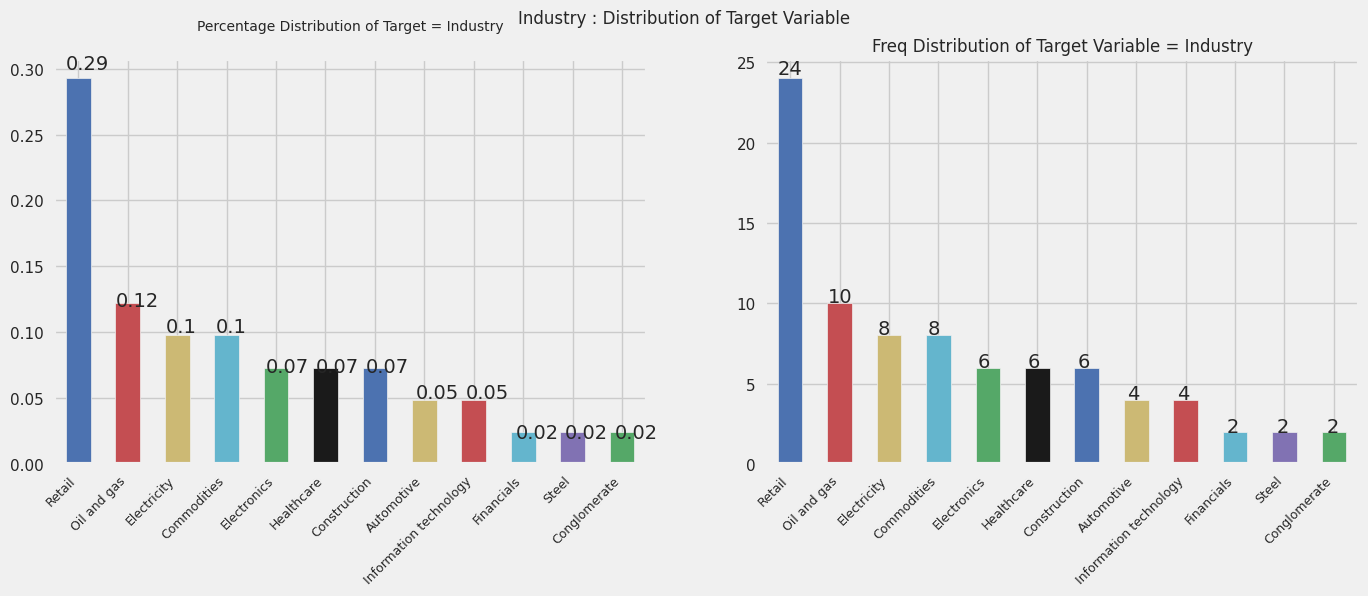

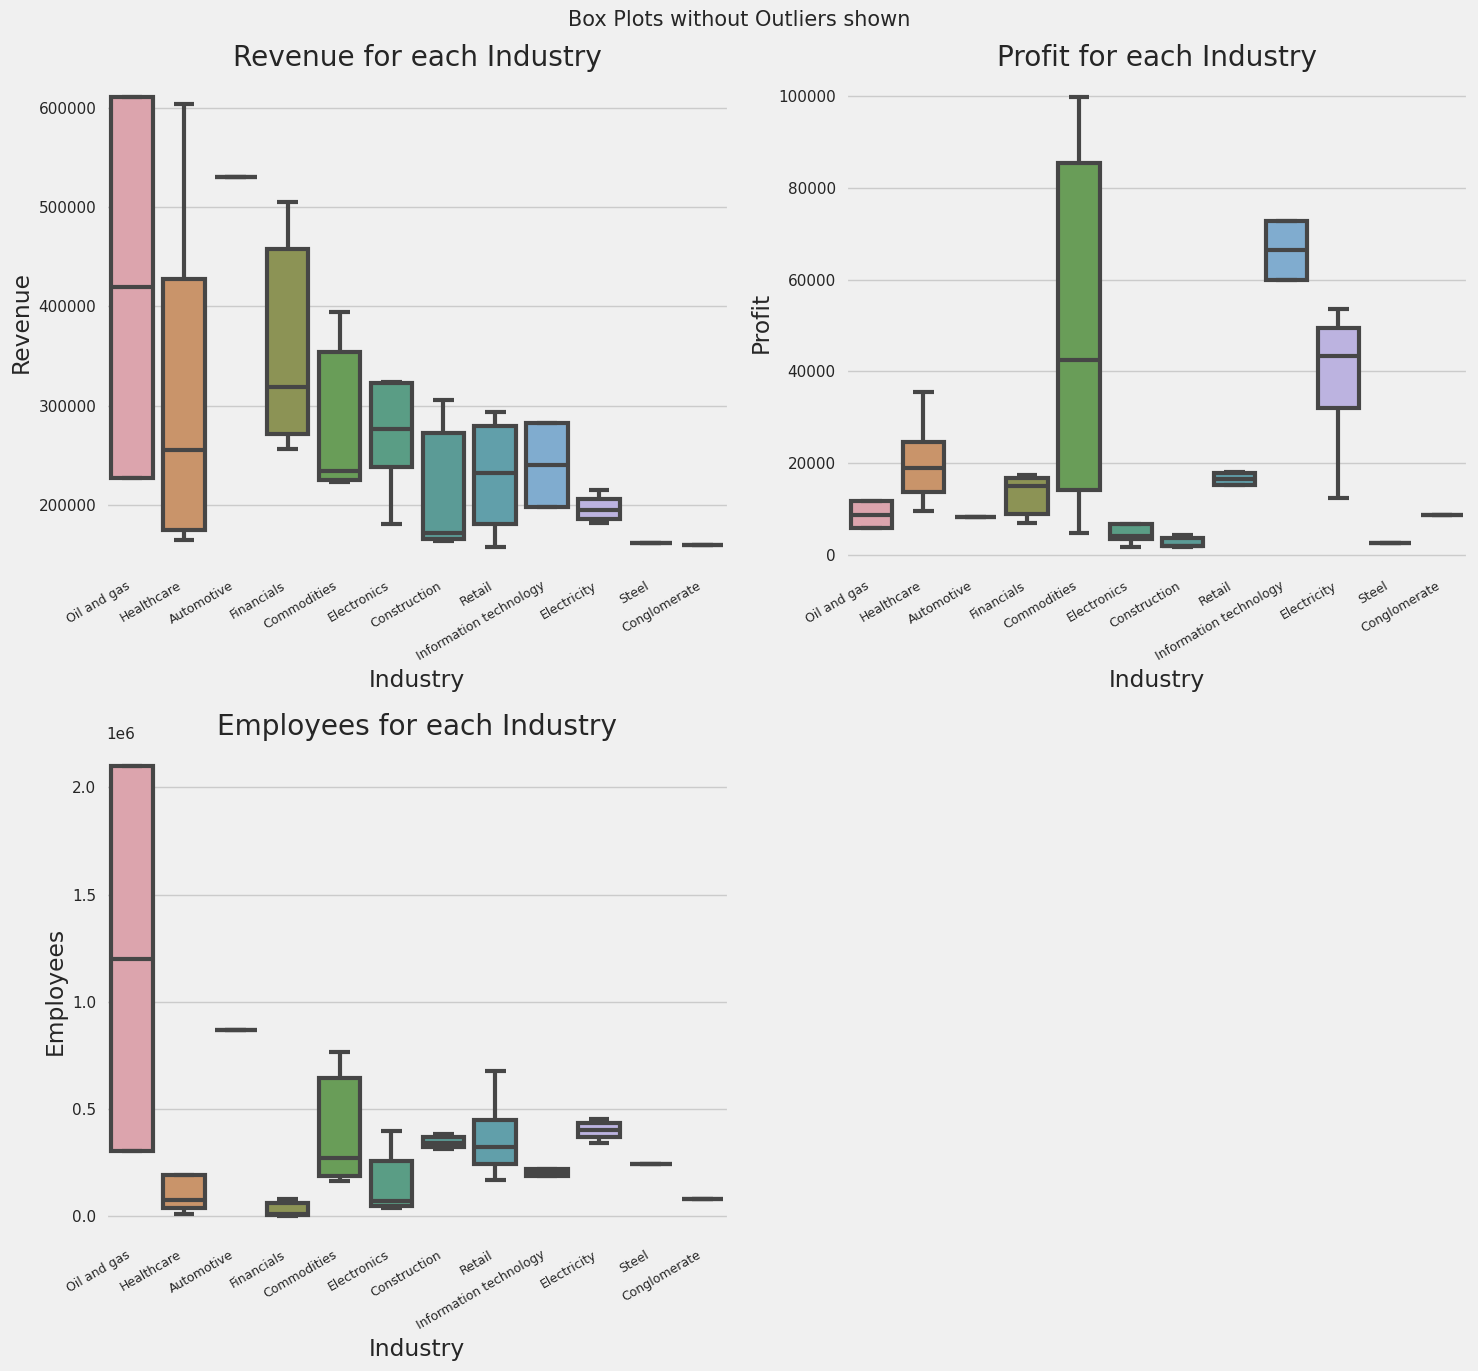

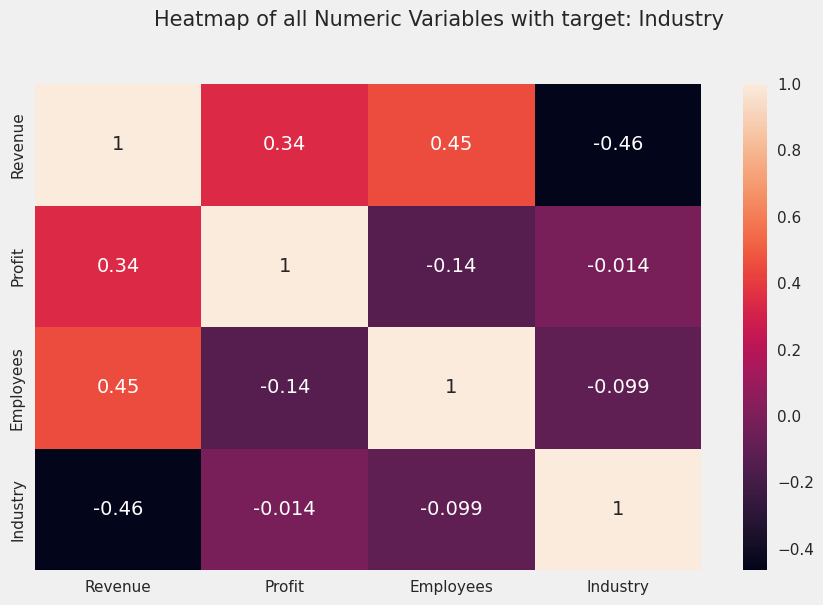

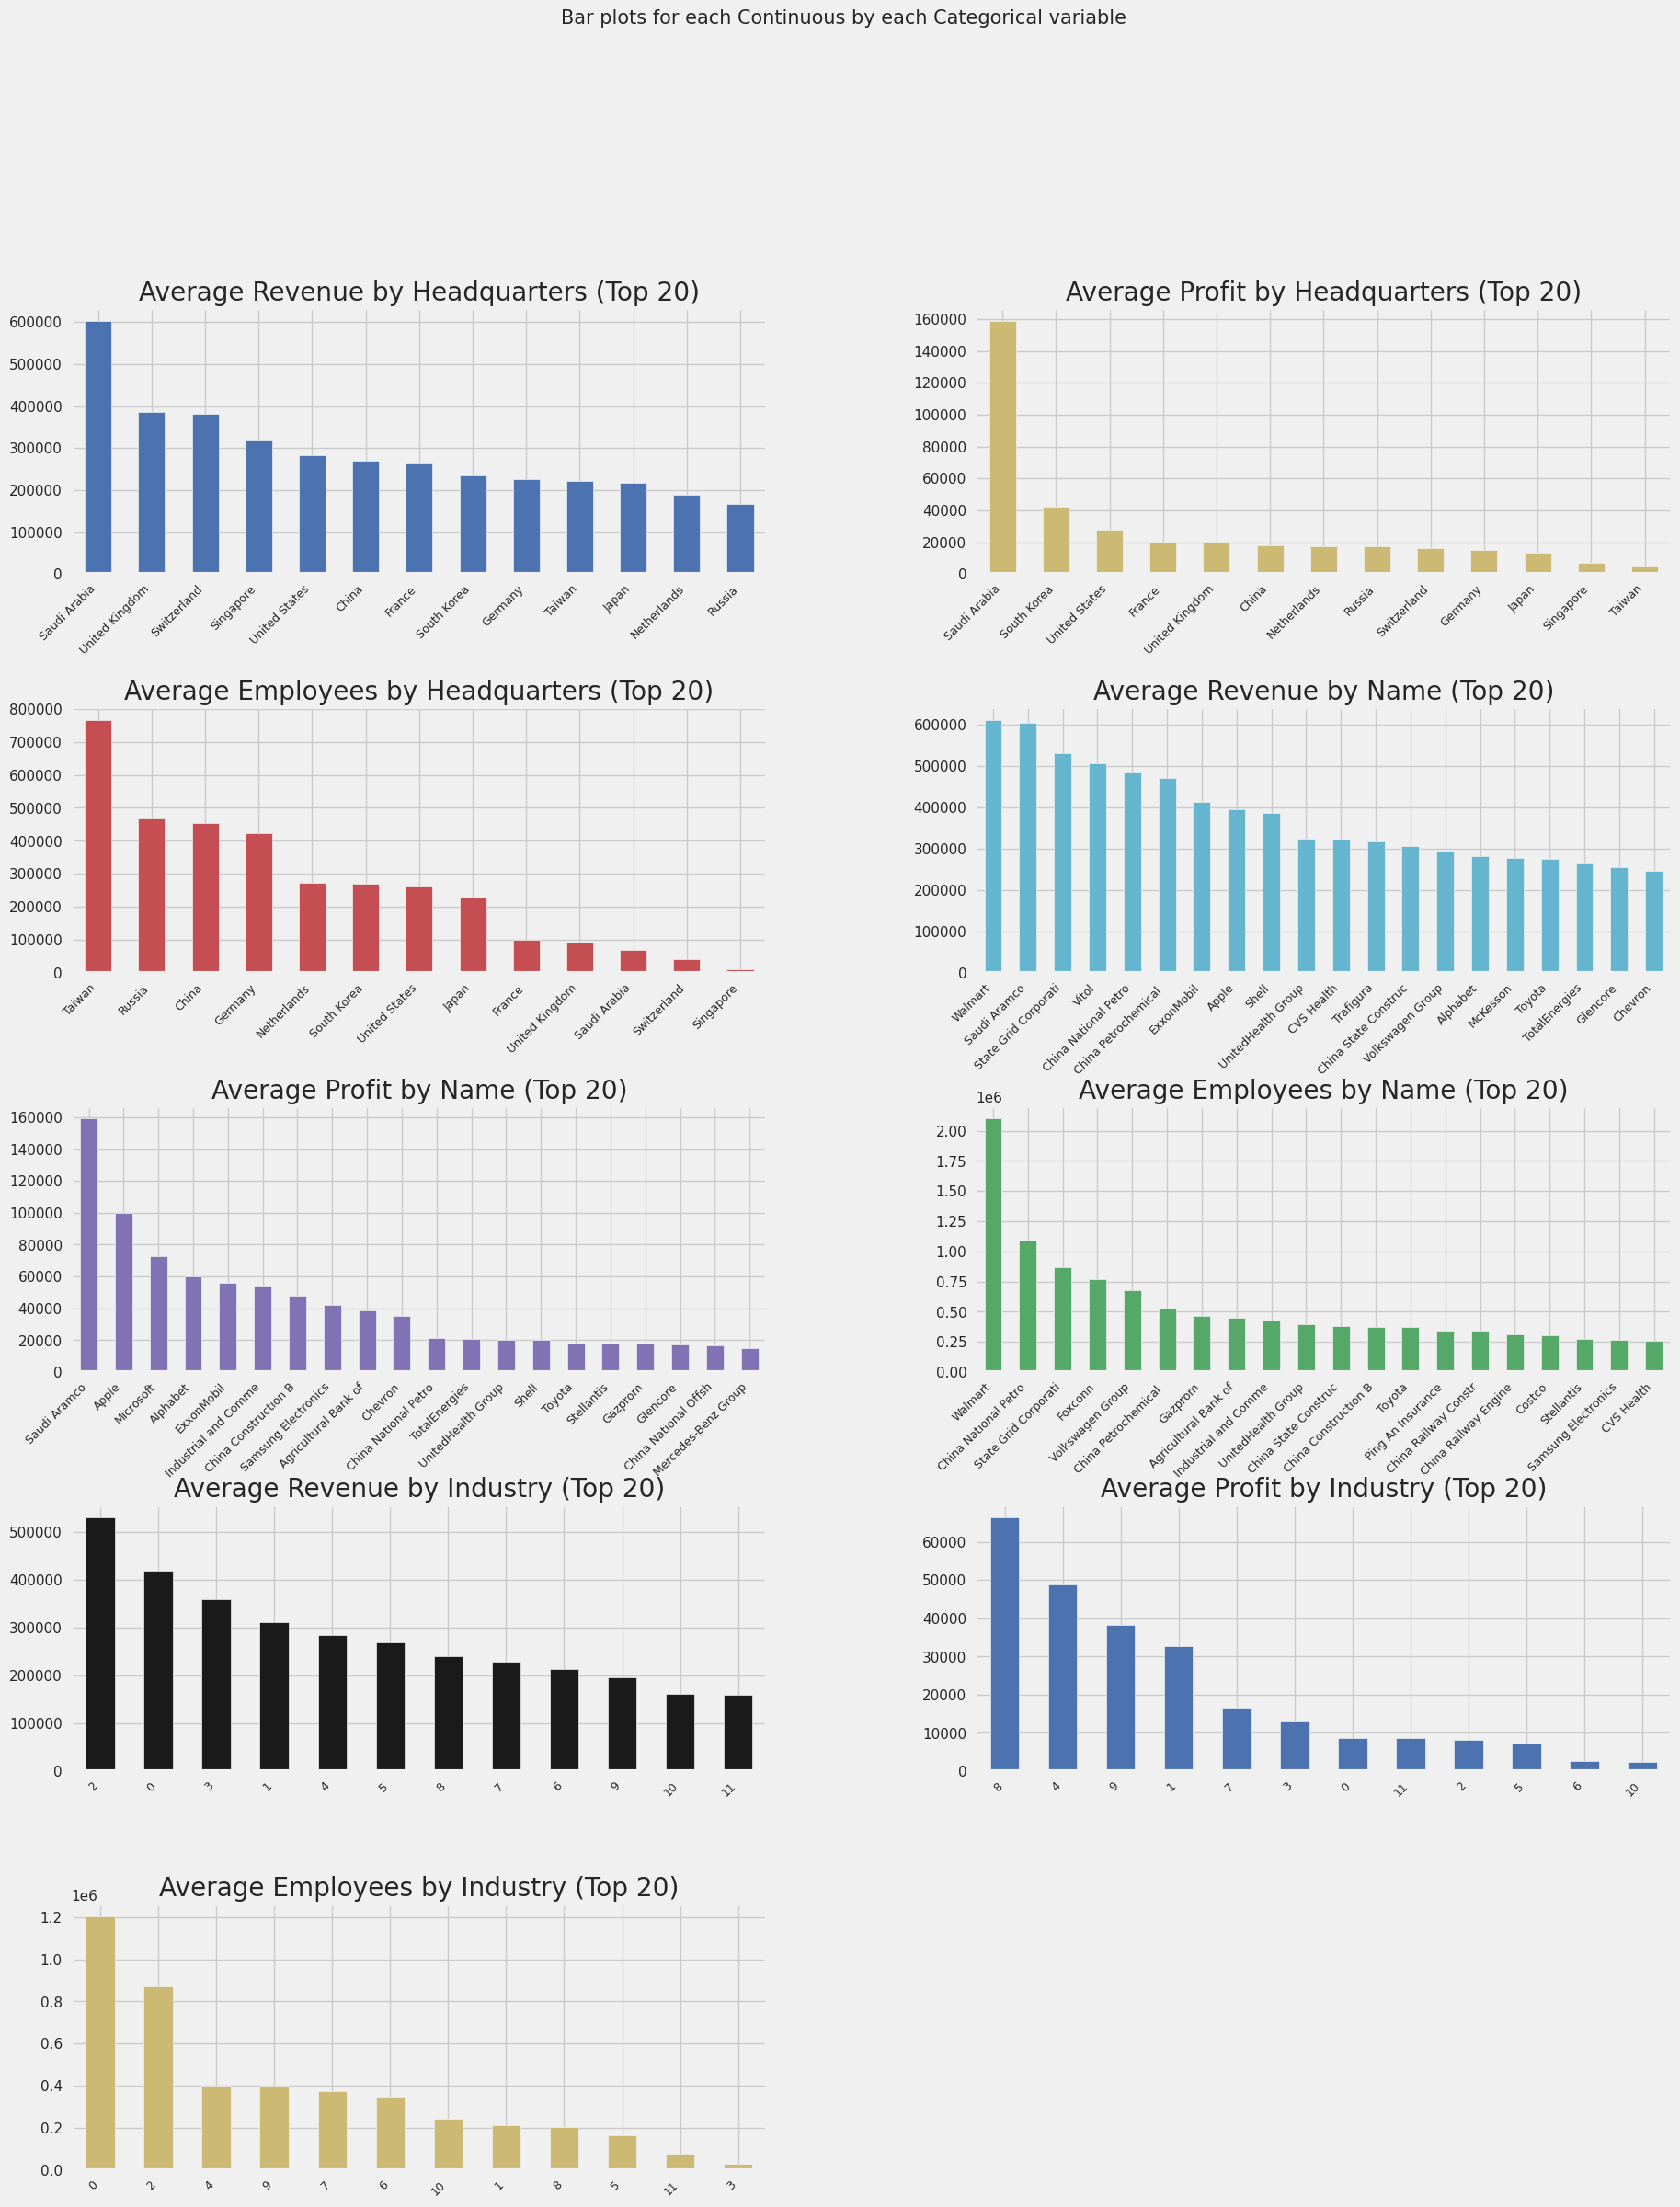

All Plots done
Time to run AutoViz = 16 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [240]:
filename = "/content/List_of_largest_companies.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="Industry",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)